# Liver Disease Prediction
In this machine learning project, we will predict whether a person is suffering from Liver Disease or not.

### Importing the necessary libraries

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Loading the Data set

In [53]:
df = pd.read_csv("D:\MajorProject\MajorProject\MajorProject\RiskAssess\indian_liver_patient.csv")
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [54]:
# Lets see the shape of the dataset

df.shape

(583, 11)

### Exploratory Data Analysis (EDA)

In [55]:
# Lets see some informations about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [56]:
# Lets see the description of the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Alamine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
Albumin_and_Globulin_Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
Dataset,583.0,1.286449,0.452490,1.0,1.0,1.00,2.0,2.0


In [57]:
# Lets check for null values

df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

We can see 4 null values in the feature Albumin_and_Globulin_Ratio

The number of patients diagnosed with liver disease: 416
The number of patients not diagnosed with liver disease: 167


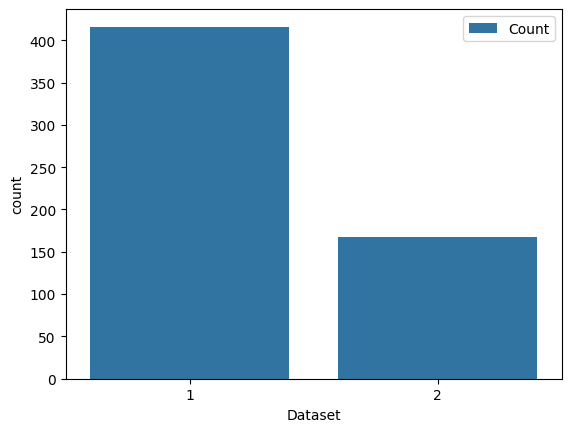

In [58]:
# Countplot to see the number of unique values in the target column("Dataset")

sns.countplot(data = df, x = "Dataset", label = "Count")
LD, NLD = df["Dataset"].value_counts()
print("The number of patients diagnosed with liver disease: {}".format(LD))
print("The number of patients not diagnosed with liver disease: {}".format(NLD))

We can see that the target ("Dataset") column is balanced.

In [59]:
# Factor plot

# sns.factorplot(x="Age", y="Gender", hue="Dataset", data=df)

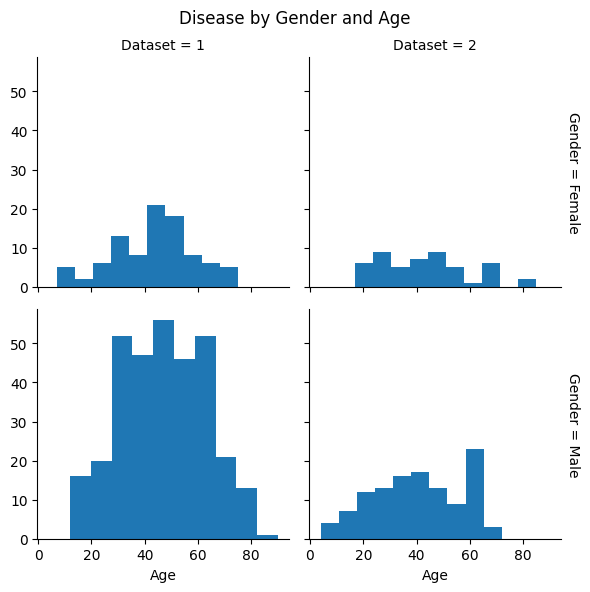

In [60]:
# Histogram

g = sns.FacetGrid(df, col="Dataset", row="Gender", margin_titles=True)
g.map(plt.hist, "Age")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age');

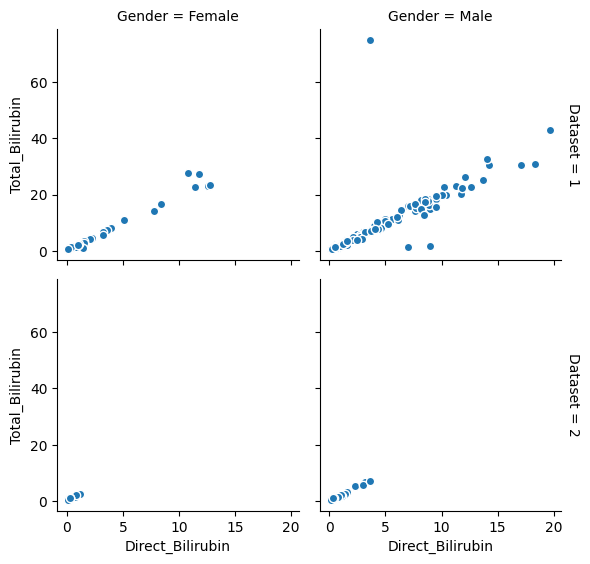

In [61]:
# Scatterplot

g = sns.FacetGrid(df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)

In [62]:
# Independent and Dependent feature for basic data analysis

x = df.drop(['Gender','Dataset'], axis=1)
Y = df['Dataset'] # 1 for liver disease; 2 for no liver disease

In [63]:
# Correlation between all the features including target

# df.corr()

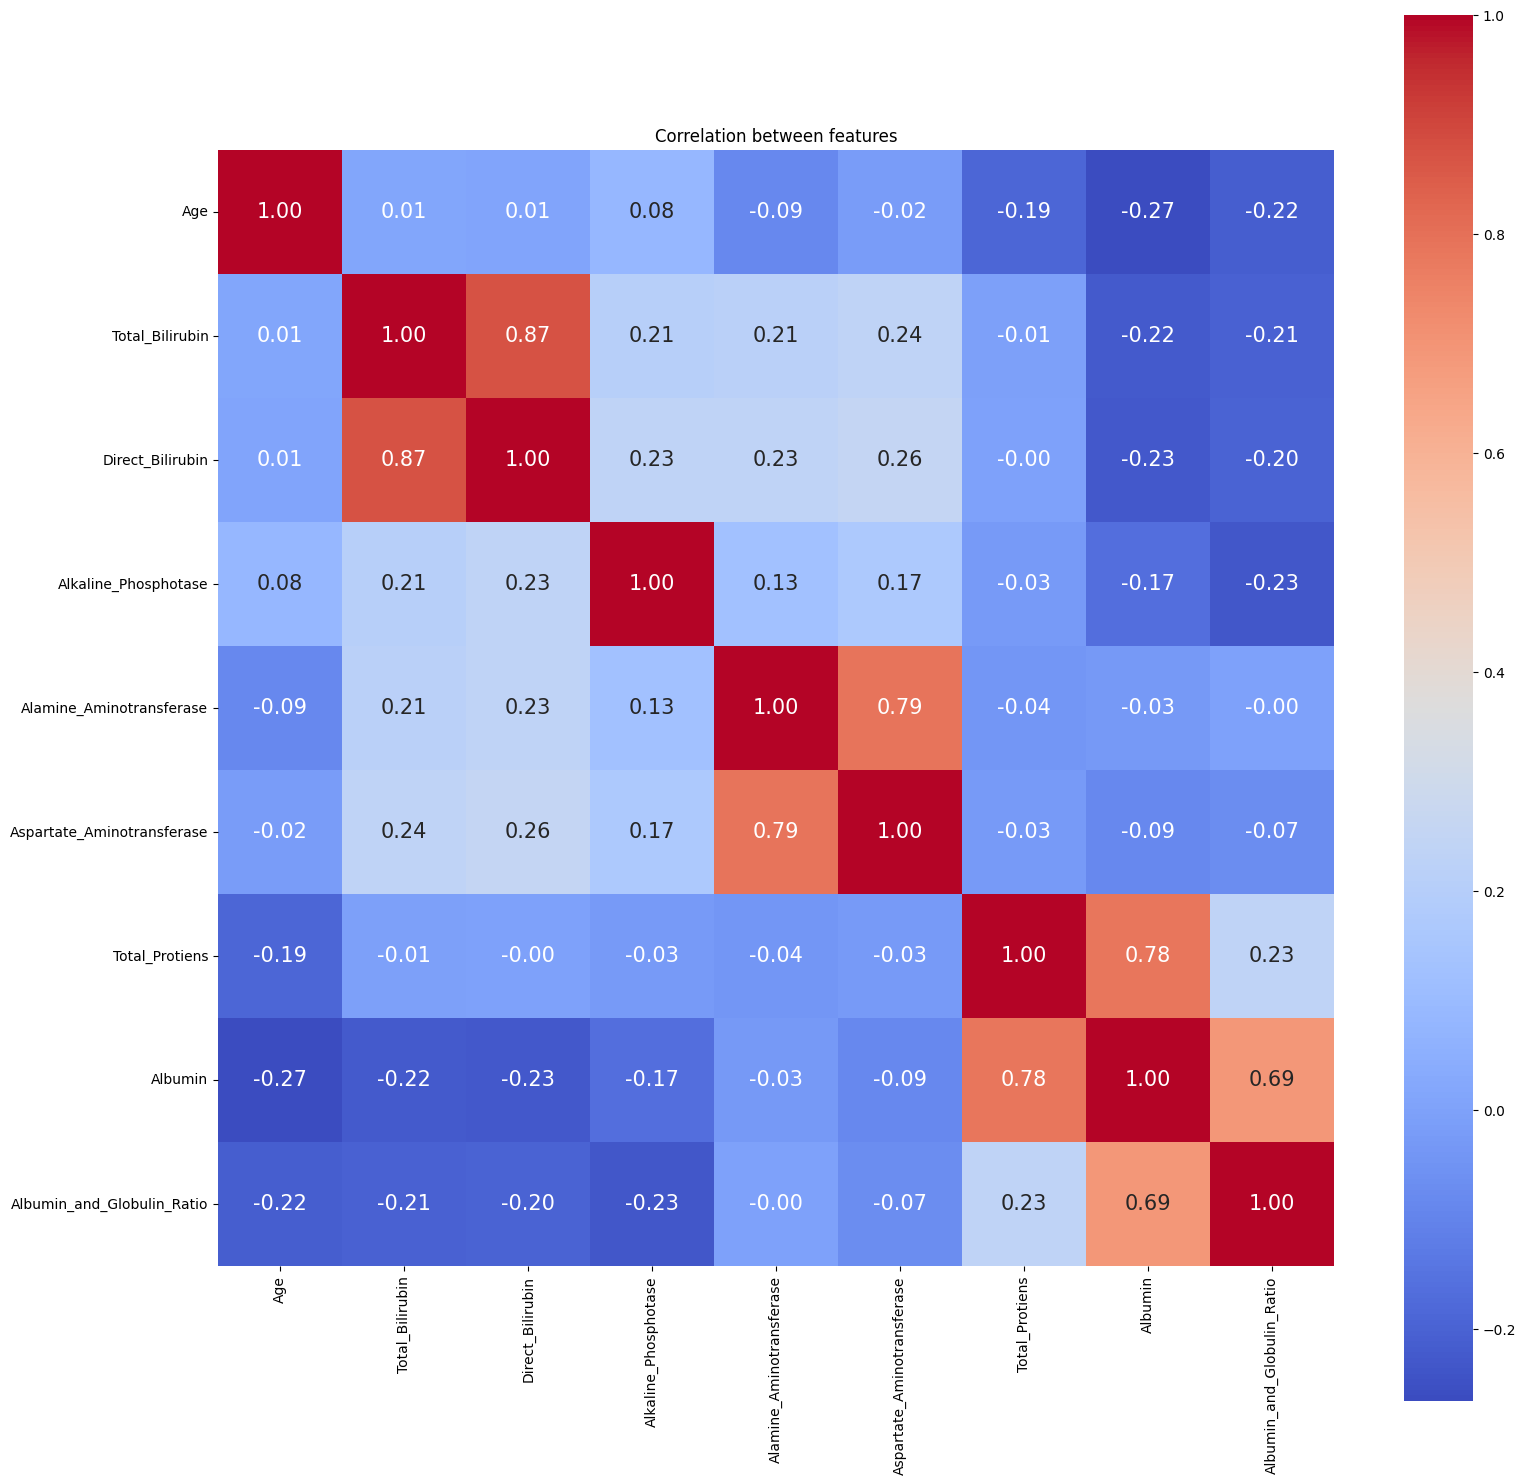

In [64]:
# Heatmap showing the correlation between the independent features

liver_corr = x.corr()
plt.figure(figsize=(18,18))
sns.heatmap(liver_corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features');

In [65]:
# Jointplot

# sns.jointplot("Total_Protiens", "Albumin", data=df, kind="reg")

### Feature Engineering

In [66]:
# Handling the missing values of the feature Albumin_and_Globulin_Ratio

df["Albumin_and_Globulin_Ratio"] = df.Albumin_and_Globulin_Ratio.fillna(df['Albumin_and_Globulin_Ratio'].mean())

In [67]:
# Label Encoding for the Gender feature

df['Gender'] = df['Gender'].apply(lambda x:1 if x == 'Male' else 0)

In [68]:
# Filling nan values(if any) with 0.94 (from domain knowledge)

df = df.fillna(0.94)

In [69]:
# Independent and Dependent features for Model Building

X=df[['Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio']]
y=df['Dataset']

In [70]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [71]:
# Lets see the shape of the train and test datasets

print('Shape training set: X:{}, y:{}'.format(X_train.shape, y_train.shape))
print('Shape test set: X:{}, y:{}'.format(X_test.shape, y_test.shape))

Shape training set: X:(408, 7), y:(408,)
Shape test set: X:(175, 7), y:(175,)


### Model Building

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
# Initializing the model

rf = RandomForestClassifier()

In [74]:
# Model Fitting

rf.fit(X_train, y_train)

RandomForestClassifier()

In [75]:
# Prediction

pred = rf.predict(X_test)

In [76]:
# Validation

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(pred, y_test))
print(confusion_matrix(pred, y_test))
print(classification_report(pred, y_test))

0.7257142857142858
[[111  33]
 [ 15  16]]
              precision    recall  f1-score   support

           1       0.88      0.77      0.82       144
           2       0.33      0.52      0.40        31

    accuracy                           0.73       175
   macro avg       0.60      0.64      0.61       175
weighted avg       0.78      0.73      0.75       175



### Hyperparameter Optimization

In [77]:
from sklearn.model_selection import RandomizedSearchCV

In [78]:
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]

# Number of features to consider at every split
max_features=['auto','sqrt', 'log2']

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(10,1000,10)]

# Minimum number of samples required to split a node
min_samples_split=[2,5,10,14]

# Minimum number of samples required at each leaf node
min_samples_leaf=[1,2,4,6,8]

# Create the random grid
random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [79]:
# Fitting the model

rf = RandomForestClassifier()
rf_randomCV = RandomizedSearchCV(estimator=rf, param_distributions = random_grid, n_iter=25, cv=3, verbose=2, random_state=100, n_jobs=-1)

### fit the randomized model
rf_randomCV.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


C:\Users\Acer\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
27 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Acer\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Acer\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Acer\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_pa

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=25,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [80]:
# Getting the best parameters

rf_randomCV.best_params_

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 120,
 'criterion': 'gini'}

In [81]:
# Getting the best estimator

rf_randomCV.best_estimator_

RandomForestClassifier(max_depth=120, min_samples_leaf=6, min_samples_split=5,
                       n_estimators=1400)

In [82]:
# Initializing the model with the best parameters

model = RandomForestClassifier(n_estimators = 2000, min_samples_split = 2, min_samples_leaf = 8, max_features = 'sqrt',
                               max_depth = 1000, criterion = 'entropy')


In [83]:
# Model Fitting with best parameters

model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=1000, min_samples_leaf=8,
                       n_estimators=2000)

In [84]:
# Prediction

y_pred = model.predict(X_test)

In [85]:
# Validation

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

0.7142857142857143
[[117  41]
 [  9   8]]
              precision    recall  f1-score   support

           1       0.93      0.74      0.82       158
           2       0.16      0.47      0.24        17

    accuracy                           0.71       175
   macro avg       0.55      0.61      0.53       175
weighted avg       0.85      0.71      0.77       175



### Saving the model for future use

In [86]:
import joblib 
joblib.dump(model,r"D:\MajorProject\MajorProject\MajorProject\RiskAssess\liver_model.pkl")

['D:\\MajorProject\\MajorProject\\MajorProject\\RiskAssess\\liver_model.pkl']